# Assignment 4 
### (and Practical 6)
## Artificial Intelligence CS303B

### Model Evaluation

In this assignment we will look in detail at evaluating models found with machine learning.

In [49]:
# Import some libraries
import os
import numpy as np
import pandas as pd
import math
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from IPython.display import Image

%matplotlib inline

### Question 1






The cell below provides methods we will use to create the data and plot the data and decision surfaces (these functions are used in the later questions).


In [152]:
# Generate Data
def create_data():
    '''
    This function creates a data set with 3 random normal distributions scaled. 
    There are two main variables in this dataset: happy and friendly.
    It also computes higher orders for the 'happy' variable (^2, ^3 and ^4).
    You can change this function with new orders or column names.
   

    RETURNS: target_name (always "success"), 
             variable_names (always ["happy", "friendly"] ), 
             data  (dataframe with the data WITHOUT higher orders), 
             Y (target variable with values 0 or 1)
    '''
    # Set the randomness
    np.random.seed(36)

    # Number of users
    n_users = 200

    # Relationships
    variable_names = ["happy", "friendly"]
    target_name = "success"

    # Generate data (3 random normal distributions!!!!)
    a = np.random.normal(5, 5, n_users )
    b = np.random.normal(10, 5, n_users )
    c = np.random.normal(20, 5, n_users )

    # Change scales
    x1 = list(a+10) + list(c+10) + list(b+10)
    x2 = list((b+10)/10) + list((b+10)/10) + list((c+10)/10)
    target = list(np.ones(len(b))) + list(np.ones(len(b))) + list(np.zeros(len(b)))

    data = pd.DataFrame(np.c_[x1, x2], columns=variable_names)

    # Add interactions
    data['happy^2'] = np.power(data['happy'], 2)
    data['happy^3'] = np.power(data['happy'], 3)
    data['happy^4'] = np.power(data['happy'], 4)

    data[target_name] = target
    Y = data[target_name]
    return target_name, variable_names, data, Y

def getX(complexity=1):
    '''
    This function returns the X-data from the 'create_data' function of this script.
    You can change the complexity to receive the main 2 columns + complex orders.
    
    INPUT: complexity (higher complexity (1 to 4) for the 'happy' variable)

    RETURNS: data  (dataframe with the data WITH higher orders IF required)
    '''
    # remove the target variable
    drops = ["success"]
    
    # if complexity = 1 then we just need to drop all the higher order from the dataframe
    for i in [2, 3, 4]:
        # based on the number of complexity required, we drop the rest of the higher orders
        if i > complexity:
            drops.append("happy^" + str(i))
    
    return data.drop(drops, 1)

# plotting method
def Decision_Surface(data, target, model, surface=True, probabilities=False, cell_size=.01):
    '''
    This function creates the surface of a decision tree using the data created with this script. 
    You can change this function to plot any column of any dataframe. 
    
    INPUT: data (created with getX() function ),
            target (Y value creted with create_data() ),
            model (Model already fitted with X and Y , i.e. DecisionTreeClassifier or logistic regression )
            surface (True if we want to display the tree surface),
            probabilities (False by default, if True we can see the color-scale based on the likelihood of being closer to the separator),
           cell_size (value for the step of the numpy arange that creates the mesh)

    RETURNS: Scatterplot with/without the surface
    '''
    # Get bounds, we only have 2 columns in the dataframe: column 0 and column 1 
    x_min, x_max = data[data.columns[0]].min(), data[data.columns[0]].max()
    y_min, y_max = data[data.columns[1]].min(), data[data.columns[1]].max()
    
    # Create a mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, cell_size), np.arange(y_min, y_max, cell_size))
    meshed_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    
    # Add interactions
    for i in range(data.shape[1]):
        if i <= 1:
            continue

        meshed_data = np.c_[meshed_data, np.power(xx.ravel(), i)]

    if model != None:
        # Predict on the mesh with labels or probability
        if probabilities:
            Z = model.predict_proba(meshed_data)[:, 1].reshape(xx.shape)
        else:
            Z = model.predict(meshed_data).reshape(xx.shape)
    
    # Plot mesh and data
#    if data.shape[1] > 2:
#        # Higher orders
#        plt.title("happy^(" + str(range(1,data.shape[1])) + ") and friendly")
#    else:
#        plt.title("happy and friendly")
    plt.xlabel("happy")
    plt.ylabel("friendly")
    if surface and model != None:
        if probabilities:
            # Color-scale on the contour (surface = separator)
            cs = plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
        else:
            # Only a curve/line on the contour (surface = separator)
            cs = plt.contourf(xx, yy, Z, levels=[-1,0,1],cmap=plt.cm.coolwarm, alpha=0.4)
    color = ["blue" if t == 0 else "red" for t in target]
    plt.scatter(data[data.columns[0]], data[data.columns[1]], color=color,s=1.5)

#### 1 a)
Run the function create_data without modification and assign the following variables so they can be used later on. 
- target name
- variable names
- data
- Y

Then use the function X() to get the LEAST COMPLEX version - that is set an X of features that has only the original value of the data (no happy^2 etc).


In [153]:
target_name, variable_names, data, Y = create_data()
X = getX()

#### 1 b)
Create a plot with the following features:
- friendly is plotted against happy (no interaction features plotted)
- color of the points are blue if target is 0
- color of points is red if target is 1

Hint: use the Decision_Surface function provided above with parameters X, Y, model=None, and surface=False, probabilities=False, cell_size=.01 (where X contains the feature variables as found with the getX() function).


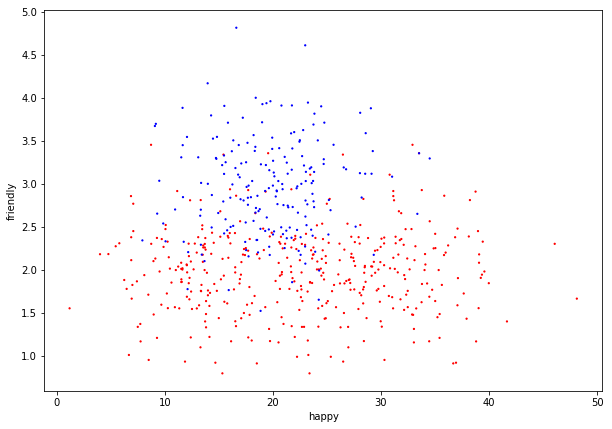

In [154]:
plt.figure(figsize=[10,7])
Decision_Surface(X, Y, None, surface=False)

#### 1 c) Generate 3 Decision Tree Classification models with different complexity and evaluate them visually and with accuracy in training data 
- Fit 3 decision trees with max depth of 1, 2, and 3. 
- Calculate accuracy of each of the tree models in terms of the predicted model values and the actual values in the data (i.e. the percentage of values in X that match the values in Y).
- Use the function Decision_Surface to plot these trees with probabilities shown: use the function call Decision_Surface(X, Y, model, probabilities=show_probabilities) to plot the data and the model determinations.
- Include the accuracy in the plot title

HINT: to calculate accuracy see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

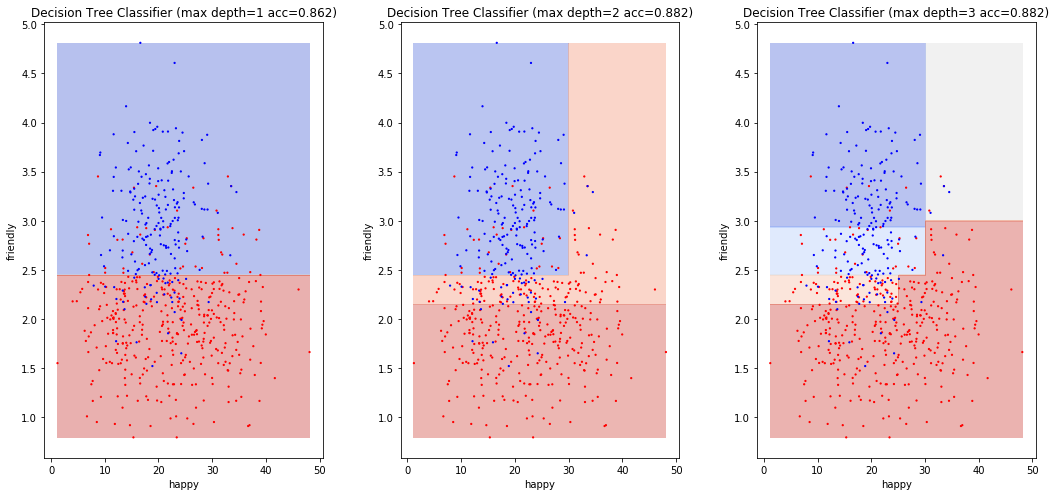

In [155]:
# Settings
depths = [1,2,3] 
show_probabilities = True

plt.figure(figsize=[15,7])

position = 1
for depth in depths:

    # Model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, Y) 
    
    # Plot
    plt.subplot(1, len(depths), position)
    position += 1
    Decision_Surface(X, Y, model, probabilities=show_probabilities)
    acc_value = metrics.accuracy_score(model.predict(X), Y) 
    plt.title("Decision Tree Classifier (max depth=" + str(depth) + " acc="+ str(round(acc_value,3)) +")" )
    
plt.tight_layout()
plt.show()

#### 1 d) Generate Logistic Regression models. 
- Generate 3 logistic regression models
- The first is a linear discriminant model with 2 features: happy and friendly (note: don't use the interaction terms here).
- The other two are created by adding the interaction terms (HINT: use the method provided to get X with X(complexity=??)).
- Plot the decision surface of all three and include the accuracy of models in the titles as for decision trees.

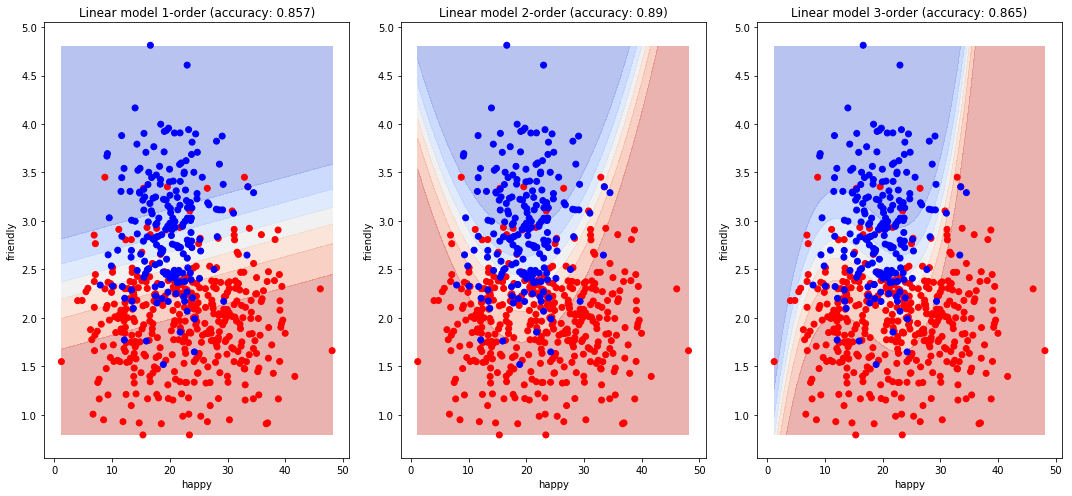

In [150]:
# Settings
max_order = 3  

show_probabilities = True
plt.figure(figsize=[15,7])

for order in range(1, max_order+1):
    # Get a dataset X_complex with non linear variables
    X_complex = getX(order)
    
    # Model used to predict
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_complex, Y)
    
    # Plot and calculate accuracy
    plt.subplot(1, max_order, order)
    Decision_Surface(X_complex, Y, model, probabilities=show_probabilities)
    acc_value = metrics.accuracy_score(model.predict(X_complex), Y) 
    plt.title("Linear model " + str(order) + "-order (accuracy: "+ str(round(acc_value,3))+")")
    
plt.tight_layout()
plt.show()

#### 1 e) Describe in your own words the reason why despite logistic regression being a linear model, we are able to generate lines to separate the classes that are not straight lines.

your answer here...

#### 1 f) In the above tests we looked at the accuracy by comparing the models predictions with the actual values we had in the data. Which was the best model overall of the linear and decision tree models. Does this result tell us how well the model can predict new values (generalisation)?

your answer here...

### Question 2

#### 2 a) Generalisation and hold out test and training data

- Use the train_test_split function in sklearn to create the following variables: X_train, X_test, Y_train, Y_test
- Make the size of the training set includes 90% of the number of points.
- Shuffle the order of the rows in the data before splitting.

Now fit each of the models from parts c and and report the test set accuracy for each of the as well.

Because we shuffled the test and training data you will get a different result each time, run the fitting procedure a few times and comment on the accuracy of the test and training sets and whether the best model found in part f is still the best model for predicting new values?


In [85]:
from sklearn.model_selection import train_test_split

# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.9)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(model.predict(X_test), Y_test) )

Accuracy on training = 0.8889
Accuracy on test = 0.8667


#### 2 b) Fitting curve
In a fitting curve we plot the accuracy (or other performance measure) against the model fitting parameters (usually complexity).

Generate a fitting curve for the decision tree approach with complexity values from 1 to 20 (as measured by maximum depth). What is the recommended model complexity (max depth) based on your plot? 

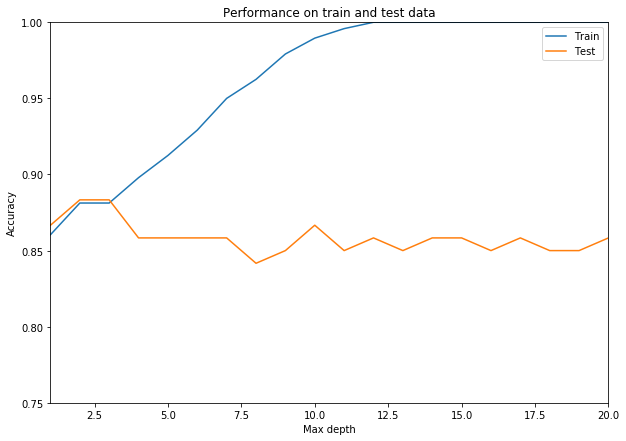

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

accuracies_train = []
accuracies_test = []
depths = range(1, 21)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    
    accuracies_train.append(metrics.accuracy_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.accuracy_score(model.predict(X_test), Y_test))

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performance on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.75, 1.0])
plt.xlim([1,20])
plt.legend()
plt.show()

#### 2 c) Cross Validation
Cross validation is a systematic way to split the data into training and test data so that all of the data is used for both test and training and allows calculating confidence intervals for out of sample performance. 

Describe the algorithm for using cross validation and the way to apply in sklearn to acheive both of the above benefits.

#### 2 d) Add a cross validation accuracy score for 5-fold Cross Validation to the learning curve from part h

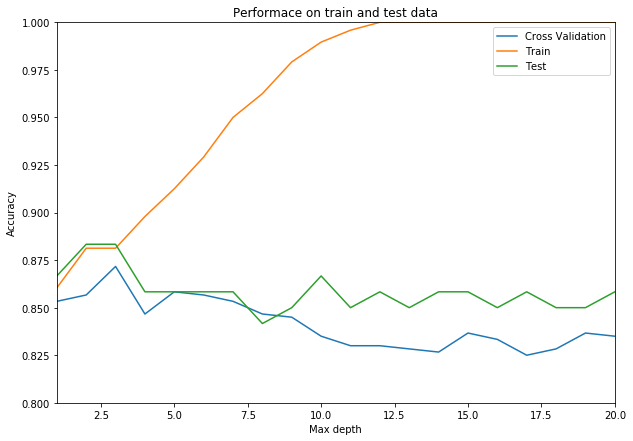

In [118]:
from sklearn.model_selection import cross_val_score

accuracies_cross_validation = []
depths = range(1, 21)

plt.figure(figsize=[10,7])

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    
    accuracies_cross_validation.append(np.mean(cross_val_score(model, X, Y,cv=5)))

plt.plot(depths, accuracies_cross_validation, label="Cross Validation")
plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performace on train and test data")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.8, 1.0])
plt.xlim([1,20])
plt.legend()
plt.show()

### Question 3
Complexity Control for Logistic Regression is called regularisation.

In logistic regression we find the set of weights, $\textbf{w}$, that maximize the fit to the data, based on some objective function (e.g. least squares). For some objective function $g()$, we use a solver find $\arg\max_\textbf{w} g(\textbf{x}, \textbf{w})$. See summary of solver options in sklearn here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

In **regularization** we **penalize** more complex models with a "penalty term" added into the objective function, and using a "regularization parameter" $\lambda$ (also sometimes represented as `c`, which is usually $\frac{1}{\lambda}$ so smaller values of `c` lead to larger complexity penalties) to specify how much importance our optimization procedure should place on the fit vs. the penalty:

$\arg\max_\textbf{w} g(\textbf{x}, \textbf{w}) - \lambda \cdot \text{penalty}(\textbf{w})$.

The two most common type of regularization in logistic regression are the so-called $L_1$ and $L_2$ regularizations, which simply use the sum of the weights (w) and the sum of the squares of the weights, respectively, as the penalty.

In [157]:
# We will use the interaction terms in the following questions
X = getX(complexity=3)
X.head()

,happy,friendly,happy^2,happy^3
0,18.382066,2.655609,337.900363,6211.306876
1,22.605496,1.809010,511.008446,11551.599351
2,12.440619,1.744645,154.768995,1925.422071
3,20.750973,2.381768,430.602888,8935.428974
4,12.046416,2.050800,145.116138,1748.129358


We can plot different regularisation weights for L1 and L2 regularisation in our data:


Fitting with L2 regularization: 



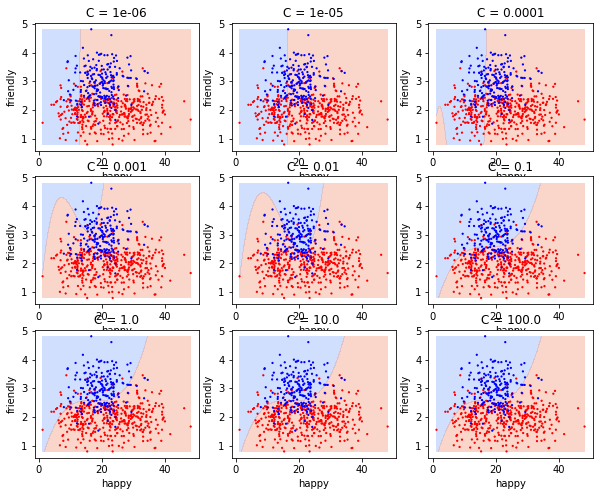


Fitting with L1 regularization: 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


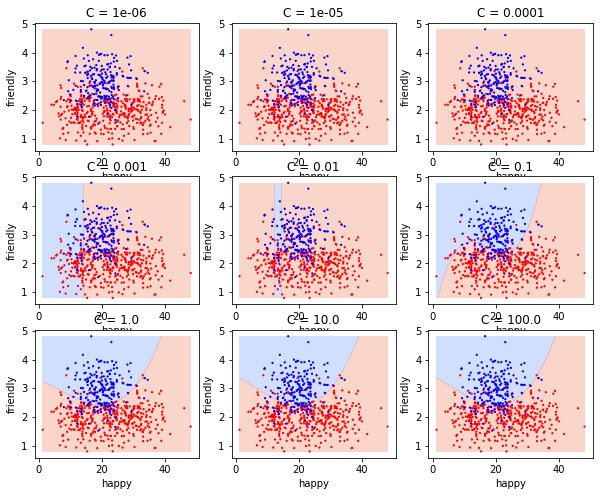

In [158]:
plt.rcParams['figure.figsize'] = 10, 8
# Plot different regularization values for L1 and L2 regularization
for regularization in ['L2', 'L1']:
    # Get a table of the model coefficients
    coefs = pd.DataFrame(columns=['C'] + list(X.columns))
    
    # Print what we are doing
    print ("\nFitting with %s regularization: \n" % regularization)
    position = 0
    
    # Try some regularization values
    for i in range(-6,3):
        # Modeling
        c = np.power(10.0, i)
        model = LogisticRegression(penalty=regularization.lower(), C=c, solver='liblinear' )
        model.fit(X, Y)
        
        # Plotting
        position += 1
        plt.subplot(3, 3, position)
        Decision_Surface(X, Y, model)
        plt.title("C = " + str(np.power(10.0, i)))
        
        # Update coefficient table
        coefs.loc[i] = [c] + list(model.coef_[0])
    # Print and plot
    #print (coefs.to_string(index=False))
    #plt.tight_layout()
    plt.show()

#### 3 a) Explain in your own words how L1 and L2 regularisation work and the reasons for the different discriminants found in the above figures. 

In [ ]:
your answer here...

#### 3 b) Scaling
When performing regularisation it is necessary to consider the scale of the features. Some may range say between 1 and 5, others may take on larger values. In many methods it is necessary to make sure the features are of comparable values: common methods are to scale to the range 0 and 1, to scale to a normal distribution with mean 0 and 1 variance.

Use sklearn to scale all the features to be in the range between 0 and 1 with mean 0.

In [159]:
from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(X, axis=0, with_mean=True, with_std=True, copy=True), columns = X.columns.values)

#### 3 c) Cross validation for logistic regression and regularisation.

Generate a Fitting Curve for L1 and L2 regularisation with 5 fold cross validation to find the most suitable level of complexity for modelling. 

#### 3 d) Learning curves.

Recall that a learning curve plots the amount of data versus a performance measure such as accuracy and analyze the change of the generalization performance based on different sizes of the training set.

Use a learning curve to decide which model (either logistic regression or decision tree induction) for this problem in the case that THERE IS LESS DATA.